Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático
-----------------------------------------------------------------------
        1 | 1.870829 | 3.708287e-01 | 1.982163e-01 | 1.375139e-01
        2 | 2.147670 | 2.768412e-01 | 1.289031e-01 | 7.664106e-02
        3 | 2.333026 | 1.853560e-01 | 7.944874e-02 | 3.435683e-02
        4 | 2.449301 | 1.162756e-01 | 4.747296e-02 | 1.352001e-02
        5 | 2.519505 | 7.020333e-02 | 2.786394e-02 | 4.928507e-03
        6 | 2.560960 | 4.145487e-02 | 1.618724e-02 | 1.718506e-03
        7 | 2.585126 | 2.416683e-02 | 9.348414e-03 | 5.840358e-04
        8 | 2.599111 | 1.398479e-02 | 5.380606e-03 | 1.955745e-04
        9 | 2.607170 | 8.058417e-03 | 3.090868e-03 | 6.493809e-05
       10 | 2.611802 | 4.632187e-03 | 1.773560e-03 | 2.145715e-05
       11 | 2.614461 | 2.658986e-03 | 1.017030e-03 | 7.070207e-06
       12 | 2.615986 | 1.525101e-03 | 5.829927e-04 | 2.325932e-06
       13 | 2.616860 | 8.743430e-04 | 3.341191e-04 | 7.644756e

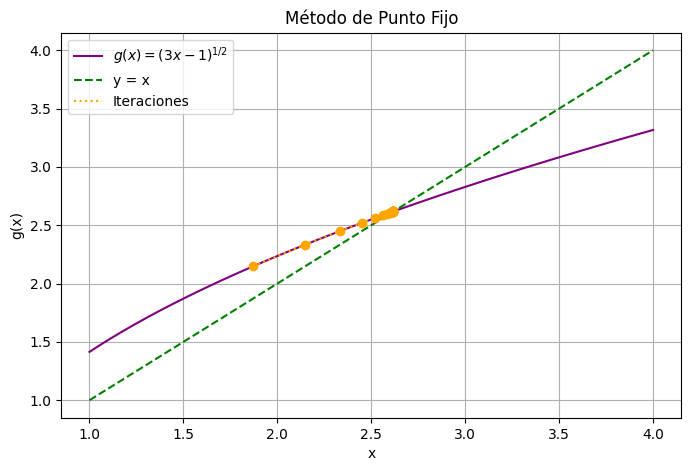

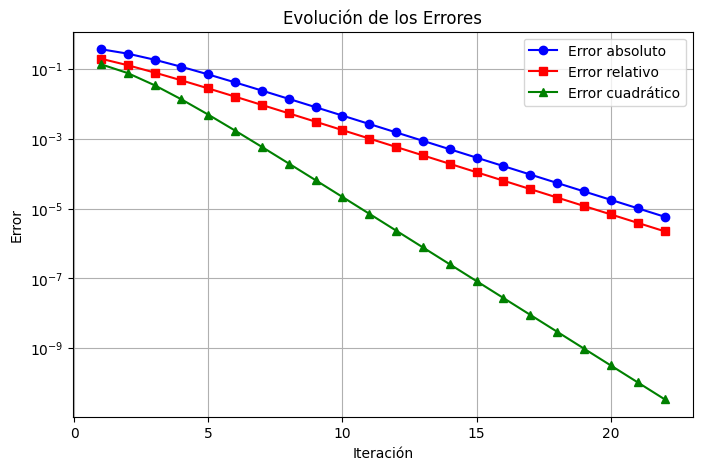

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función de iteración para el método de punto fijo
def g(x):
    return (3*x - 1)**(1/2)

# Derivada de g(x) para verificar la convergencia
def g_prime(x):
    return (3/2) * (3*x - 1)**(-1/2)

# Cálculo del error absoluto
def error_absoluto(x_new, x_old):
    return abs(x_new - x_old)

# Cálculo del error relativo
def error_relativo(x_new, x_old):
    return abs((x_new - x_old) / x_new)

# Cálculo del error cuadrático
def error_cuadratico(x_new, x_old):
    return (x_new - x_old)**2

# Implementación del método de punto fijo
def punto_fijo(x0, tol=1e-5, max_iter=100):
    iteraciones = []
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    x_old = x0
    for i in range(max_iter):
        x_new = g(x_old)
        e_abs = error_absoluto(x_new, x_old)
        e_rel = error_relativo(x_new, x_old)
        e_cuad = error_cuadratico(x_new, x_old)

        iteraciones.append((i+1, x_new, e_abs, e_rel, e_cuad))
        errores_abs.append(e_abs)
        errores_rel.append(e_rel)
        errores_cuad.append(e_cuad)

        if e_abs < tol:
            break

        x_old = x_new

    return iteraciones, errores_abs, errores_rel, errores_cuad

# Parámetro inicial
x0 = 1.5
iteraciones, errores_abs, errores_rel, errores_cuad = punto_fijo(x0)

# Imprimir tabla de iteraciones
print("Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático")
print("-----------------------------------------------------------------------")
for it in iteraciones:
    print(f"{it[0]:9d} | {it[1]:.6f} | {it[2]:.6e} | {it[3]:.6e} | {it[4]:.6e}")

# Generar valores para la gráfica de convergencia
x_vals = np.linspace(1, 4, 100)
y_vals = g(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r"$g(x) = (3x-1)^{1/2}$", color="purple")
plt.plot(x_vals, x_vals, linestyle="dashed", color="green", label="y = x")

# Graficar puntos de iteración
x_points = [it[1] for it in iteraciones]
y_points = [g(x) for x in x_points]
plt.scatter(x_points, y_points, color="orange", zorder=3)
plt.plot(x_points, y_points, linestyle="dotted", color="orange", label="Iteraciones")

plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.title("Método de Punto Fijo")
plt.savefig("punto_fijo_convergencia.png")
plt.show()

# Graficar la evolución de los errores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errores_abs) + 1), errores_abs, marker="o", color="blue", label="Error absoluto")
plt.plot(range(1, len(errores_rel) + 1), errores_rel, marker="s", color="red", label="Error relativo")
plt.plot(range(1, len(errores_cuad) + 1), errores_cuad, marker="^", color="green", label="Error cuadrático")

plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.title("Evolución de los Errores")
plt.savefig("errores_punto_fijo.png")
plt.show()
